In [1]:
!ls

01_first_notebook.ipynb
03_exploratory_data_analysis.ipynb.txt
1585598437_Bayesian_Optimization_Case_Study.zip
1600185186_GridSearchKNN_Case_Study.zip
1631809090_1481053515_ultimate_challenge_3_.zip
ASdfafd.ipynb
AppleStore.csv
Applications
Bayesian_optimization_case_study.ipynb
COVID-19 Activity.csv
Capstone 2 - SAT Scores - Data Wrangling.ipynb
Capstone 2 - SAT Scores - Modeling (2) (1).ipynb
Capstone 3 - Data Scraping.ipynb
Capstone 3 Israel-Palestine - Op_Ed Analysis -- Complete.ipynb
Capstone Final.ipynb
Cowboy Cigarettes Case Study - Tier 1.ipynb
CowboyCigsData.csv
DataScienceGuidedCapstone
Desktop
Documents
Downloads
GridSearchKNN_Case_Study.ipynb
Library
Logistic Regression Advanced Case Study.ipynb
London Housing Complete.ipynb
London_Housing.ipynb
London_Housing_2.ipynb
Movies
Music
Op-Ed Sentiments - Sheet1 (10).csv
Op-Ed Sentiments - Sheet1 (11).csv
Op-Ed Sentiments - Sheet1 (12).csv
Op-Ed Sentiments - Sheet1 (13).csv
Op-Ed Sentiments - Sheet1 (14).csv
Op-Ed Sentiments - Sh

In [3]:
import json

In [4]:
with open('ultimate_data_challenge.json', 'r') as file:
    ultimate_data = json.load(file)

In [5]:
with open('logins.json', 'r') as file:
    logins_data = json.load(file)

In [6]:
# If the data is a list, view the first few elements
print(ultimate_data[:5])  # Adjust the number as needed

# If the data is a dictionary, view its keys
if isinstance(ultimate_data, dict):
    print(ultimate_data.keys())

[{'city': "King's Landing", 'trips_in_first_30_days': 4, 'signup_date': '2014-01-25', 'avg_rating_of_driver': 4.7, 'avg_surge': 1.1, 'last_trip_date': '2014-06-17', 'phone': 'iPhone', 'surge_pct': 15.4, 'ultimate_black_user': True, 'weekday_pct': 46.2, 'avg_dist': 3.67, 'avg_rating_by_driver': 5.0}, {'city': 'Astapor', 'trips_in_first_30_days': 0, 'signup_date': '2014-01-29', 'avg_rating_of_driver': 5.0, 'avg_surge': 1.0, 'last_trip_date': '2014-05-05', 'phone': 'Android', 'surge_pct': 0.0, 'ultimate_black_user': False, 'weekday_pct': 50.0, 'avg_dist': 8.26, 'avg_rating_by_driver': 5.0}, {'city': 'Astapor', 'trips_in_first_30_days': 3, 'signup_date': '2014-01-06', 'avg_rating_of_driver': 4.3, 'avg_surge': 1.0, 'last_trip_date': '2014-01-07', 'phone': 'iPhone', 'surge_pct': 0.0, 'ultimate_black_user': False, 'weekday_pct': 100.0, 'avg_dist': 0.77, 'avg_rating_by_driver': 5.0}, {'city': "King's Landing", 'trips_in_first_30_days': 9, 'signup_date': '2014-01-10', 'avg_rating_of_driver': 4.

In [7]:
import pandas as pd

ultimate_data_df = pd.DataFrame(ultimate_data)
logins_data_df = pd.DataFrame(logins_data)

In [8]:
ultimate_data_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [12]:
logins_data_df.head(-5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93132,1970-04-13 18:36:53
93133,1970-04-13 18:40:31
93134,1970-04-13 18:46:06
93135,1970-04-13 18:40:40


In [13]:
logins_df = logins_data_df

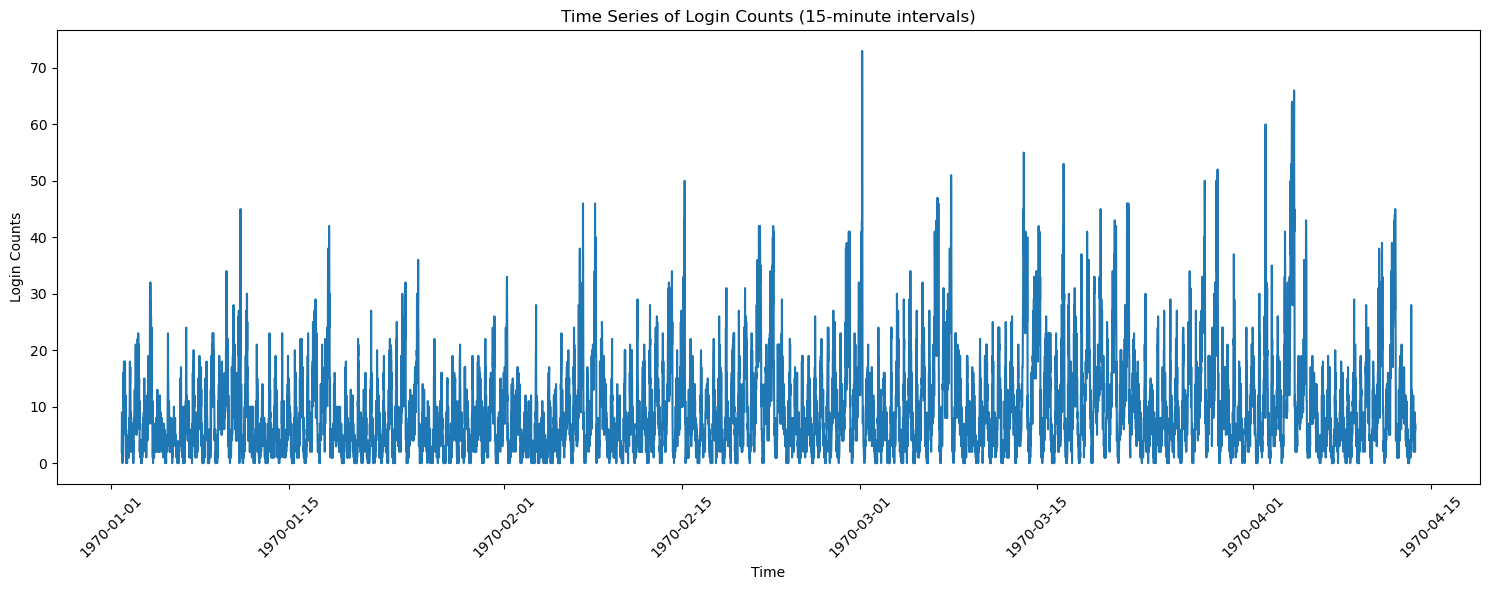

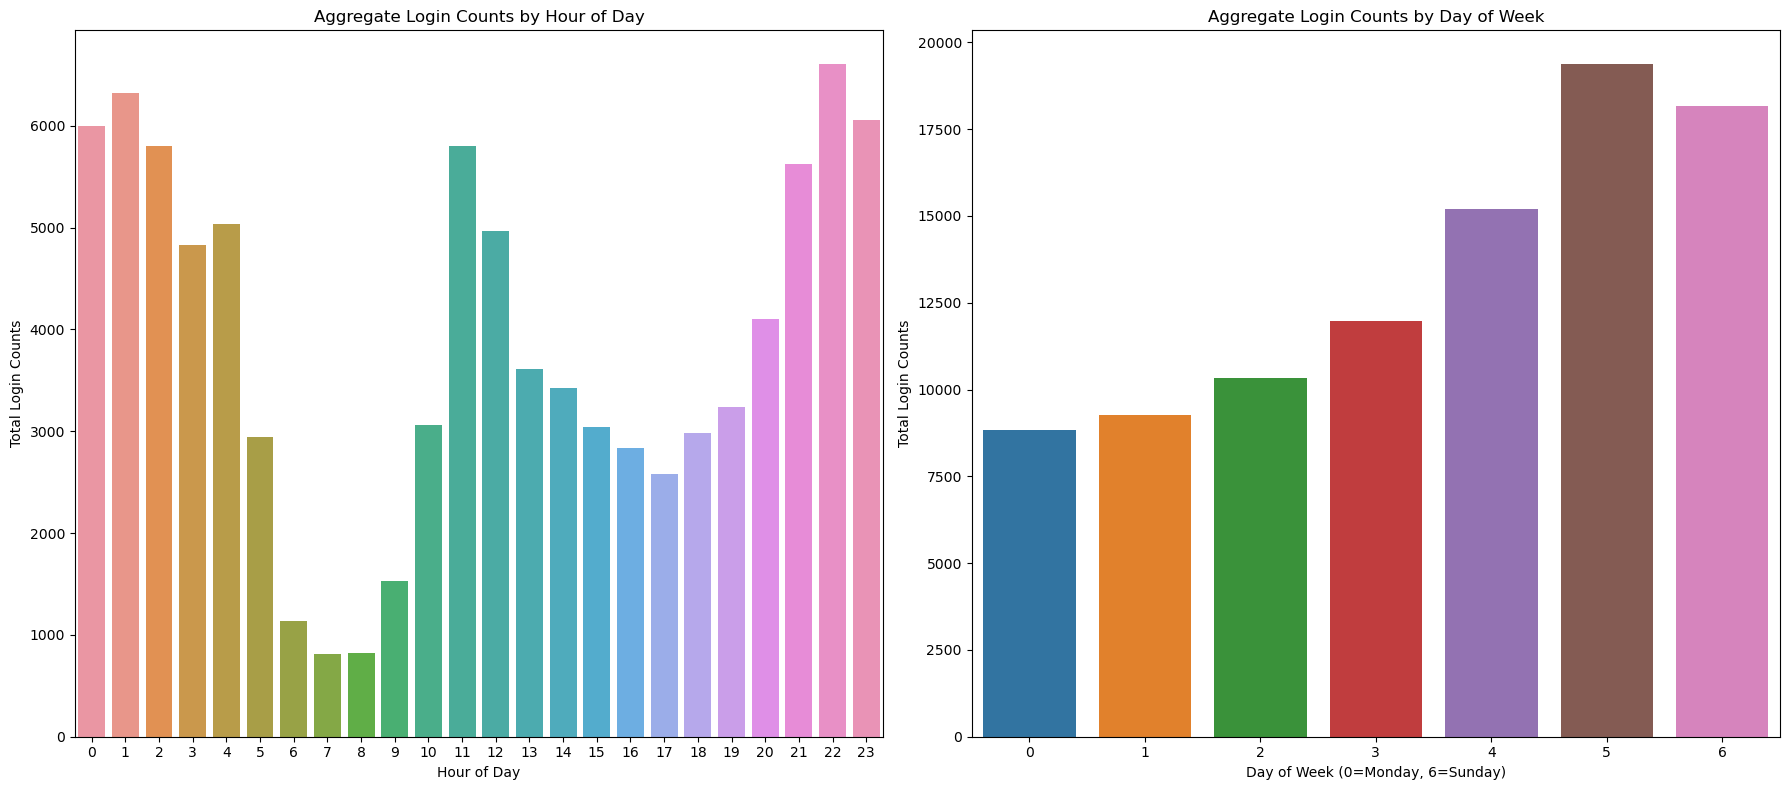

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'logins.json'
logins_df = pd.read_json(file_path)

# Convert the login times to a datetime index and resample in 15-minute intervals
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_15min = logins_df.resample('15T').count()

# Plotting the time series of login counts
plt.figure(figsize=(15, 6))
plt.plot(logins_15min.index, logins_15min['count'])
plt.title('Time Series of Login Counts (15-minute intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Extract hour of day and day of week from the index for further analysis
logins_15min['hour'] = logins_15min.index.hour
logins_15min['day_of_week'] = logins_15min.index.dayofweek

# Aggregate login counts by hour of day
hourly_logins = logins_15min.groupby('hour')['count'].sum()

# Aggregate login counts by day of week
daily_logins = logins_15min.groupby('day_of_week')['count'].sum()

# Plotting
plt.figure(figsize=(18, 8))

# Hourly patterns
plt.subplot(1, 2, 1)
sns.barplot(x=hourly_logins.index, y=hourly_logins.values)
plt.title('Aggregate Login Counts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Login Counts')

# Daily patterns
plt.subplot(1, 2, 2)
sns.barplot(x=daily_logins.index, y=daily_logins.values)
plt.title('Aggregate Login Counts by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Login Counts')

plt.tight_layout()
plt.show()

In [17]:
ultimate_data_df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [18]:
# Impute 'avg_rating_by_driver' with the mean
ultimate_data_df['avg_rating_by_driver'].fillna(ultimate_data_df['avg_rating_by_driver'].mean(), inplace=True)

# Impute 'avg_rating_of_driver' with the median
ultimate_data_df['avg_rating_of_driver'].fillna(ultimate_data_df['avg_rating_of_driver'].median(), inplace=True)

# Impute 'phone' with the mode (most common value)
most_common_phone = ultimate_data_df['phone'].mode()[0]
ultimate_data_df['phone'].fillna(most_common_phone, inplace=True)

In [19]:
import pandas as pd

# Assuming ultimate_df is your DataFrame
# Convert 'signup_date' and 'last_trip_date' to datetime
ultimate_data_df['signup_date'] = pd.to_datetime(ultimate_data_df['signup_date'])
ultimate_data_df['last_trip_date'] = pd.to_datetime(ultimate_data_df['last_trip_date'])

# Determine the most recent trip date in the dataset
most_recent_trip_date = ultimate_data_df['last_trip_date'].max()

# Create a binary column for retention
ultimate_data_df['retained'] = ((most_recent_trip_date - ultimate_data_df['last_trip_date']).dt.days <= 30).astype(int)

# Check the first few rows to verify
ultimate_data_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


Retention Rate: 37.61%


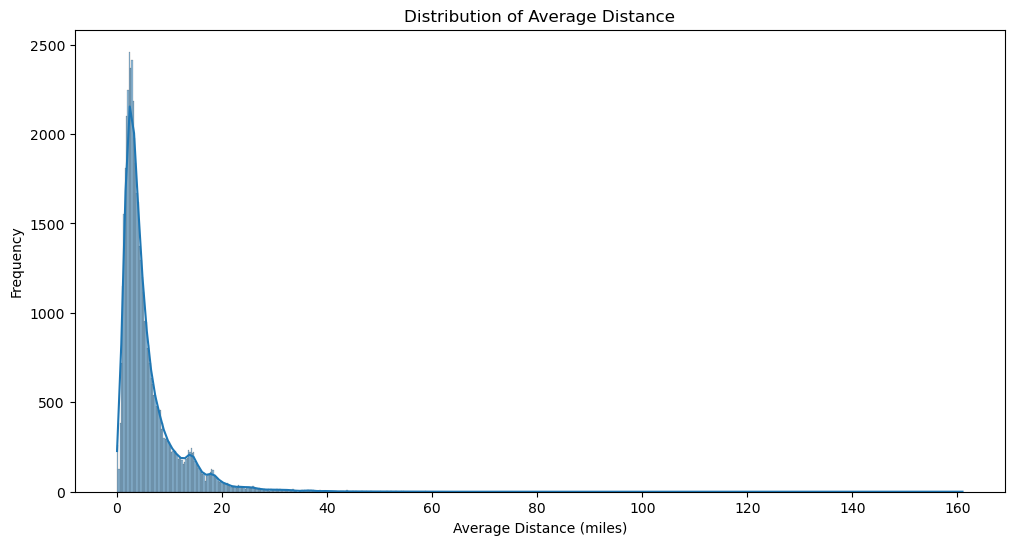

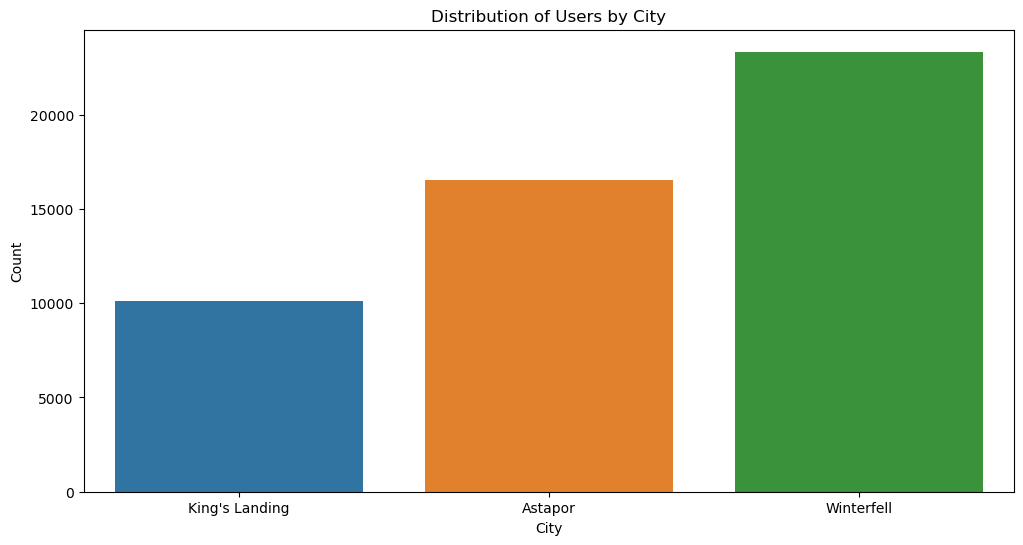

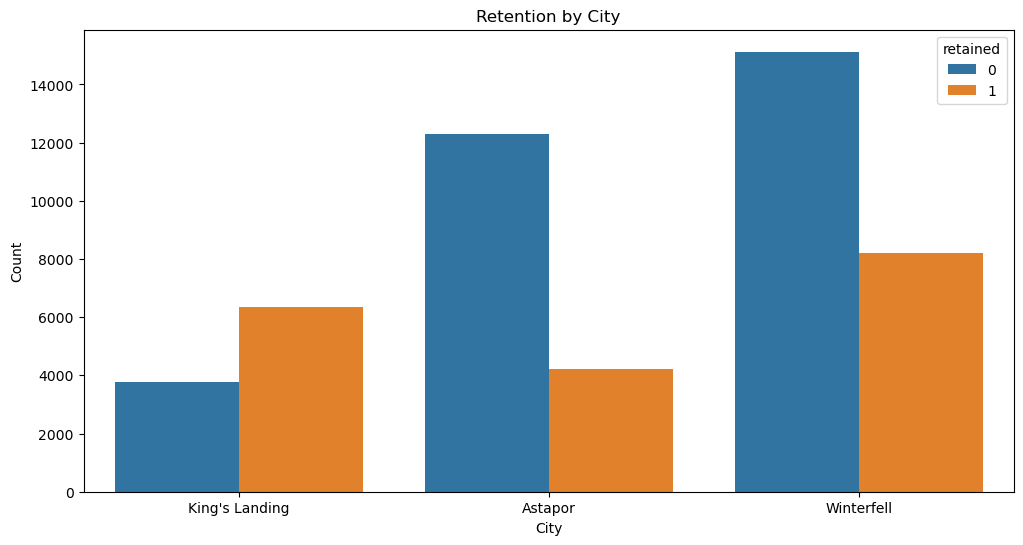

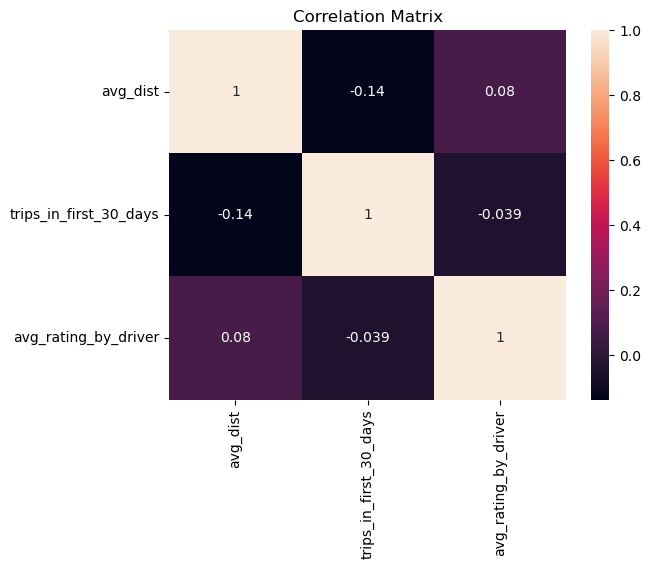

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


retention_rate = ultimate_data_df['retained'].mean()
print(f"Retention Rate: {retention_rate:.2%}")

plt.figure(figsize=(12, 6))
sns.histplot(ultimate_data_df['avg_dist'], kde=True)
plt.title('Distribution of Average Distance')
plt.xlabel('Average Distance (miles)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='city', data=ultimate_data_df)
plt.title('Distribution of Users by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='retained', data=ultimate_data_df)
plt.title('Retention by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


correlation_matrix = ultimate_data_df[['avg_dist', 'trips_in_first_30_days', 'avg_rating_by_driver']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [24]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Create day of week and week of year features from signup_date
ultimate_data_df['signup_day_of_week'] = ultimate_data_df['signup_date'].dt.dayofweek
ultimate_data_df['signup_week_of_year'] = ultimate_data_df['signup_date'].dt.isocalendar().week

# Duration in days between signup and last trip
ultimate_data_df['duration'] = (ultimate_data_df['last_trip_date'] - ultimate_data_df['signup_date']).dt.days

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_features = encoder.fit_transform(ultimate_data_df[['city', 'phone']])

# Convert boolean to numeric
ultimate_data_df['ultimate_black_user'] = ultimate_data_df['ultimate_black_user'].astype(int)

# Combine the original DataFrame with the encoded categorical features
encoded_columns = [f'feature_{i}' for i in range(categorical_features.shape[1])]
ultimate_data_df = ultimate_data_df.join(pd.DataFrame(categorical_features, columns=encoded_columns, index=ultimate_data_df.index))

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define features and target variable
X = ultimate_data_df.drop(['retained', 'signup_date', 'last_trip_date', 'city', 'phone'], axis=1)
y = ultimate_data_df['retained']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6219
           1       0.99      0.99      0.99      3781

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

AUC-ROC: 0.9996758319572406


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define features and target variable
X = ultimate_data_df.drop(['retained', 'signup_date', 'last_trip_date', 'city', 'phone'], axis=1)
y = ultimate_data_df['retained']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     28028
           1       0.97      0.98      0.98     16972

    accuracy                           0.98     45000
   macro avg       0.98      0.98      0.98     45000
weighted avg       0.98      0.98      0.98     45000

AUC-ROC: 0.9984885583844794


In [26]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print("AUC-ROC scores for each fold:", cv_scores)
print("Average AUC-ROC score:", np.mean(cv_scores))

AUC-ROC scores for each fold: [0.99958506 0.99964583 0.99957032 0.999747   0.99961272]
Average AUC-ROC score: 0.9996321868093572


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Define features and target variable
X = ultimate_data_df.drop(['retained', 'signup_date', 'last_trip_date', 'city', 'phone'], axis=1)
y = ultimate_data_df['retained']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"{name} - AUC-ROC: {auc_score:.4f}")

/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - AUC-ROC: 1.0000
Decision Tree - AUC-ROC: 0.9995
